<a href="https://colab.research.google.com/github/23f1002944/EDA-Probability-Distributions/blob/main/Joint_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we check joint probability, marginal probability, conditional probability and independence of events, in a power play over data

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/PowerPlay.xlsx'

try:
    df = pd.read_excel(file_path)
    print("DataFrame loaded successfully:")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DataFrame loaded successfully:


In [ ]:
# Calculate total runs in the first over (columns '0.1' to '0.6')
df['first_over_runs'] = df[['0.1', '0.2', '0.3', '0.4', '0.5', '0.6']].sum(axis=1)
# Create the new column 'more_than_4_in_first_over'
df['more_than_4_in_first_over'] = (df['first_over_runs'] > 4).astype(int)

# Joint Probability Analysis
X= Probability of scoring more than 4 runs in the first over
Y= Probability of getting a perticular venue/stadium

We need fxy(x,y), joint probability

The one has the highest joint probability, tells which stadium is most likely to have players score more than 4 runs in the first over

## Calculate joint probability for each venue
Group the DataFrame by 'venue' and calculate the joint probability of 'more_than_4_in_first_over' being 1 for each venue.


In [ ]:
# Calculate the total number of rows in the DataFrame
total_rows = len(df)

# Group by 'venue' and count the number of occurrences where 'more_than_4_in_first_over' is 1
joint_occurrence_count_by_venue = df.groupby('venue')['more_than_4_in_first_over'].sum()

# Calculate the joint probability by dividing the count by the total number of rows
joint_probability_by_venue = joint_occurrence_count_by_venue / total_rows

print("Joint probability of scoring more than 4 runs in the first over for each venue:")
display(joint_probability_by_venue.head())

Joint probability of scoring more than 4 runs in the first over for each venue:


,more_than_4_in_first_over
venue,
Barabati Stadium,0.005006
Brabourne Stadium,0.011890
Buffalo Park,0.001252
De Beers Diamond Oval,0.003129
Dr DY Patil Sports Academy,0.010638


## Visualize the probabilities

2d pareto chart, showing joint probabilities

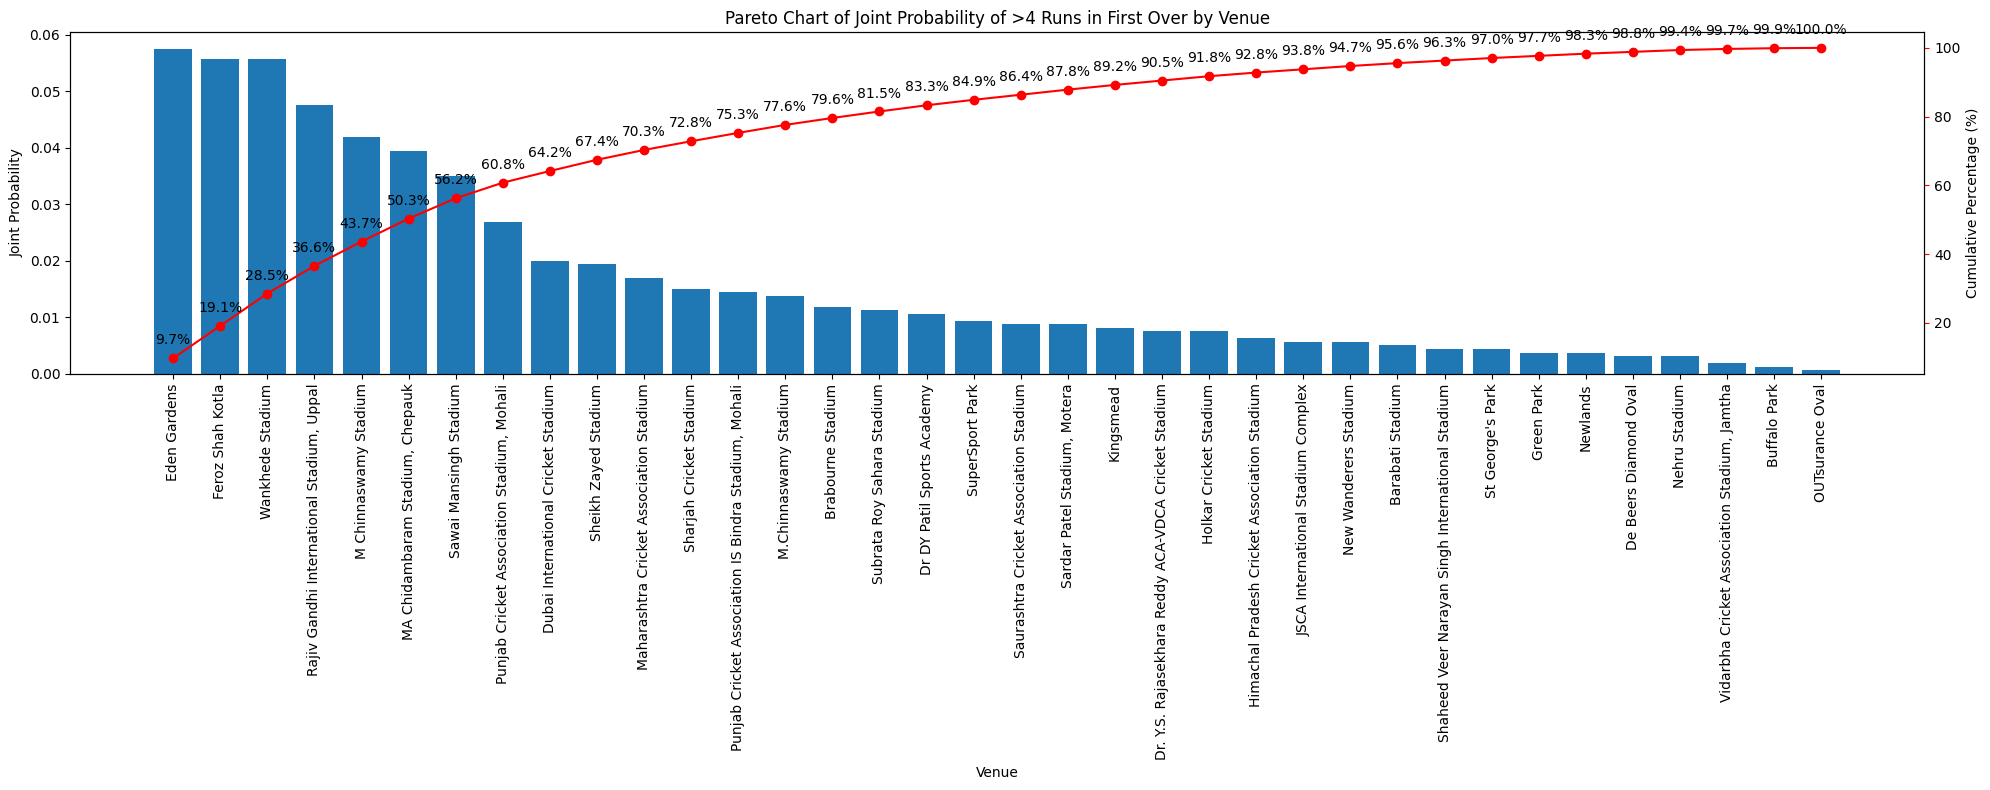

In [ ]:
# Sort the joint probabilities in descending order
sorted_joint_probability = joint_probability_by_venue.sort_values(ascending=False)

# Calculate the cumulative percentage
cumulative_percentage = sorted_joint_probability.cumsum() / sorted_joint_probability.sum() * 100

# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(20, 8))

# Bar plot for joint probabilities
ax1.bar(sorted_joint_probability.index, sorted_joint_probability.values)
ax1.set_xlabel("Venue")
ax1.set_ylabel("Joint Probability")
ax1.tick_params(axis='x', rotation=90)
ax1.set_title("Pareto Chart of Joint Probability of >4 Runs in First Over by Venue")

# Line plot for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(sorted_joint_probability.index, cumulative_percentage, color='red', marker='o')
ax2.set_ylabel("Cumulative Percentage (%)")
ax2.tick_params(axis='y', color='red')

# Add data labels to cumulative percentage line
for i, txt in enumerate(cumulative_percentage):
    ax2.annotate(f'{txt:.1f}%', (sorted_joint_probability.index[i], cumulative_percentage.iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')


plt.tight_layout()
plt.show()

3d chart showing a 2d object of discrete joint probability

/tmp/ipython-input-3013012819.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


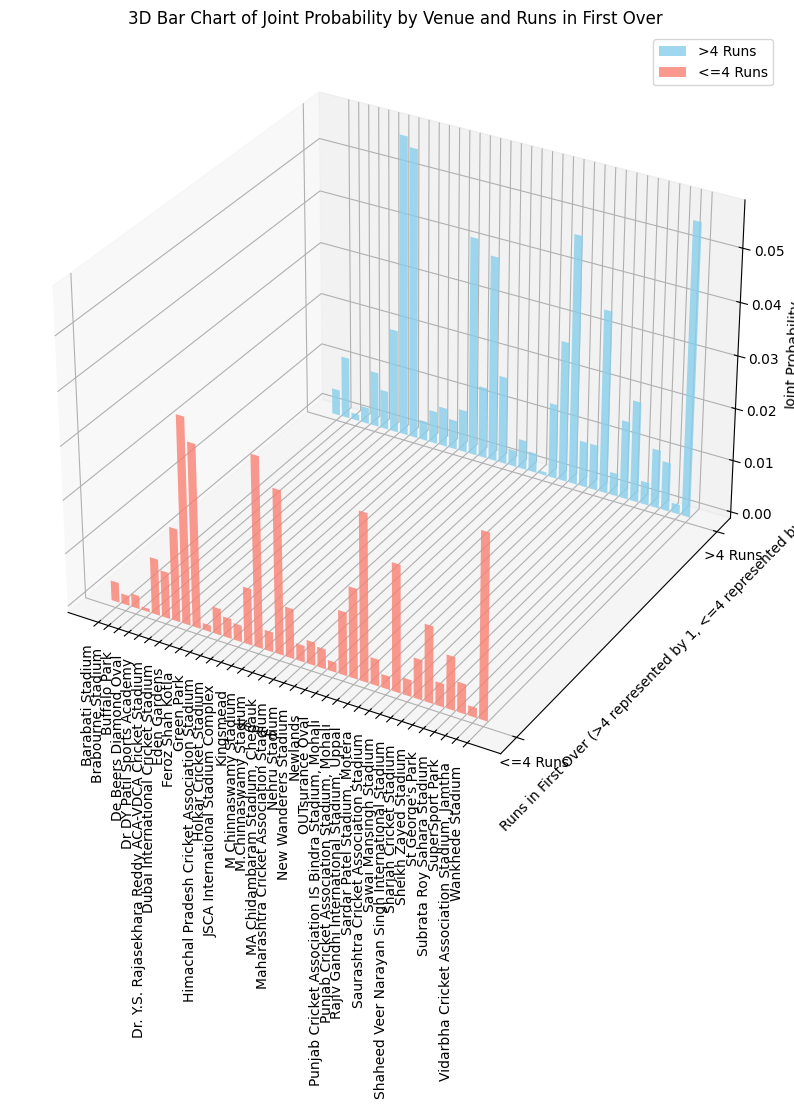

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Prepare data for 3D plot
# We need the joint probability for >4 runs (value 1) and <=4 runs (value 0) for each venue.
# Joint probability for value 1 is already calculated in joint_probability_by_venue.
# Joint probability for value 0 = P(<=4 runs AND Venue X) = (Count of <=4 runs at Venue X) / Total rows

# Calculate count of <=4 runs in the first over for each venue
less_than_4_occurrence_count_by_venue = df.groupby('venue')['more_than_4_in_first_over'].apply(lambda x: (x == 0).sum())

# Calculate joint probability of <=4 runs for each venue
joint_probability_less_than_4_by_venue = less_than_4_occurrence_count_by_venue / total_rows

# Combine the data for both outcomes (0 and 1)
venues = joint_probability_by_venue.index
x_pos = np.arange(len(venues))

# Heights for the bars (joint probabilities)
heights_more_than_4 = joint_probability_by_venue.values
heights_less_than_4 = joint_probability_less_than_4_by_venue.values

# Create the 3D plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Create bars for >4 runs (value 1)
ax.bar(x_pos, heights_more_than_4, zs=1, zdir='y', color='skyblue', alpha=0.8, label='>4 Runs')

# Create bars for <=4 runs (value 0)
ax.bar(x_pos, heights_less_than_4, zs=0, zdir='y', color='salmon', alpha=0.8, label='<=4 Runs')


# Set labels and title
ax.set_xlabel('Venue')
ax.set_ylabel('Runs in First Over (>4 represented by 1, <=4 represented by 0)')
ax.set_zlabel('Joint Probability')
ax.set_title('3D Bar Chart of Joint Probability by Venue and Runs in First Over')

# Set x-axis ticks and labels
ax.set_xticks(x_pos)
ax.set_xticklabels(venues, rotation=90)

# Set y-axis ticks and labels
ax.set_yticks([0, 1])
ax.set_yticklabels(['<=4 Runs', '>4 Runs'])

# Add a legend
ax.legend()

plt.tight_layout()
plt.show()

Marginal Sum of probability of getting >4 runs in first over

Marginal Sum of probability of total Venue in the stadium

In [ ]:
# Calculate the marginal probability of getting >4 runs in the first over
# This is the sum of the joint probabilities P(>4 runs AND Venue X) for all venues,
# which is equivalent to the total number of instances with >4 runs divided by the total number of rows.
marginal_prob_greater_than_4_runs = df['more_than_4_in_first_over'].mean()

print(f"Marginal Probability of scoring >4 runs in the first over: {marginal_prob_greater_than_4_runs:.4f}")

# Calculate the marginal probability (PMF) of each venue
# This is the number of occurrences of each venue divided by the total number of rows.
marginal_prob_venue = df['venue'].value_counts() / len(df)

print("\nMarginal Probability Mass Function (PMF) of Venues:")
display(marginal_prob_venue)

print("\nSum of Marginal Probabilities of all Venues:")
print(marginal_prob_venue.sum())

Marginal Probability of scoring >4 runs in the first over: 0.5920

Marginal Probability Mass Function (PMF) of Venues:


,count
venue,
Eden Gardens,0.096370
Wankhede Stadium,0.090113
Feroz Shah Kotla,0.090113
"Rajiv Gandhi International Stadium, Uppal",0.078849
M Chinnaswamy Stadium,0.077597
"MA Chidambaram Stadium, Chepauk",0.070088
Sawai Mansingh Stadium,0.058824
"Punjab Cricket Association Stadium, Mohali",0.043805
Dubai International Cricket Stadium,0.037547



Sum of Marginal Probabilities of all Venues:
1.0


Now we check for independence of both events >4 runs in first over and Venue

For this, we first calculate the product of marginals and then we will compare it to joint probability array

Comparison of Joint Probability and Product of Marginals by Venue:


,Joint Probability,Product of Marginals
venue,,
Barabati Stadium,0.005006,0.005186
Brabourne Stadium,0.011890,0.008150
Buffalo Park,0.001252,0.002223
De Beers Diamond Oval,0.003129,0.002223
Dr DY Patil Sports Academy,0.010638,0.012596


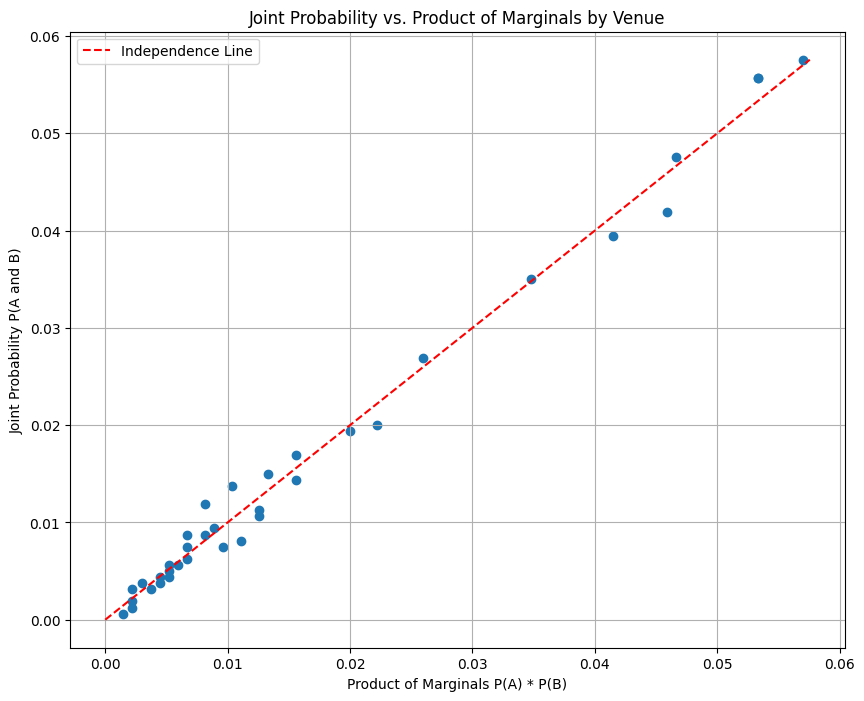

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame from the joint probabilities
joint_prob_df = joint_probability_by_venue.rename("Joint Probability")

# Create a DataFrame from the product of marginals
product_marg_df = product_of_marginals.rename("Product of Marginals")

# Merge the two DataFrames based on the venue index
comparison_table = pd.merge(joint_prob_df, product_marg_df, left_index=True, right_index=True)

print("Comparison of Joint Probability and Product of Marginals by Venue:")
display(comparison_table.head())

# Create a scatter plot to visualize independence
plt.figure(figsize=(10, 8))
plt.scatter(comparison_table['Product of Marginals'], comparison_table['Joint Probability'])

# Add a diagonal line for perfect independence (where Joint Probability = Product of Marginals)
max_prob = max(comparison_table['Joint Probability'].max(), comparison_table['Product of Marginals'].max())
plt.plot([0, max_prob], [0, max_prob], color='red', linestyle='--', label='Independence Line')

plt.xlabel("Product of Marginals P(A) * P(B)")
plt.ylabel("Joint Probability P(A and B)")
plt.title("Joint Probability vs. Product of Marginals by Venue")
plt.legend()
plt.grid(True)
plt.show()

Looking at the scatter plot, the points representing the joint probabilities and the product of marginals for each venue do not fall exactly on the red independence line. This suggests that the joint probability is not consistently equal to the product of the marginal probabilities.

In [41]:
import numpy as np

def get_first_nonzero_digit(number):
    """Finds the first non-zero digit of a number after the decimal point."""
    if number == 0:
        return 0  # Or handle as appropriate, e.g., return None
    # Convert to string to find the decimal point and digits
    s = f"{number:.10f}" # Format to ensure enough decimal places
    # Find the decimal point
    decimal_point_index = s.find('.')
    if decimal_point_index == -1:
        # No decimal point, check the integer part
        for digit in s:
            if digit != '-':
                if digit != '0':
                    return int(digit)
        return 0 # All digits are zero

    # Check digits after the decimal point
    for digit in s[decimal_point_index + 1:]:
        if digit != '0':
            return int(digit)
    return 0 # All digits after decimal point are zero

# Apply the function to both columns and compare the results
comparison_table['First Non-Zero Digit Match'] = comparison_table.apply(
    lambda row: get_first_nonzero_digit(row['Joint Probability']) == get_first_nonzero_digit(row['Product of Marginals']),
    axis=1
)

print("Comparison based on the first non-zero digit:")
display(comparison_table)

Comparison based on the first non-zero digit:


,Joint Probability,Product of Marginals,First Non-Zero Digit Match
venue,,,
Barabati Stadium,0.005006,0.005186,True
Brabourne Stadium,0.011890,0.008150,False
Buffalo Park,0.001252,0.002223,False
De Beers Diamond Oval,0.003129,0.002223,False
Dr DY Patil Sports Academy,0.010638,0.012596,True
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,0.007509,0.009632,False
Dubai International Cricket Stadium,0.020025,0.022227,True
Eden Gardens,0.057572,0.057050,True
Feroz Shah Kotla,0.055695,0.053346,True


In [ ]:
# Count the number of True and False values in the 'First Non-Zero Digit Match' column
num_matches = comparison_table['First Non-Zero Digit Match'].sum()
num_no_matches = (~comparison_table['First Non-Zero Digit Match']).sum()

print(f"Number of venues where the first non-zero digit matches: {num_matches}")
print(f"Number of venues where the first non-zero digit does NOT match: {num_no_matches}")

Number of venues where the first non-zero digit matches: 21
Number of venues where the first non-zero digit does NOT match: 15


Clearly, for the majority part, Product of Marginals is not equal to Joint Probability

Here we conclude

Getting >4 runs in first over is not independent of choosing a venue
Instead, a specific venue biases the chance of scoring >4 runs in the first over

# Conditional Probability
Now we will understand this in context of our above example

Basically, Conditional = Joint / Marginal, these two we have already calculated above

So we will calcualte Conditional by two ways and compare them to each other

1) Joint/Marginal way
2) Counting the probability of scoring >4 runs in over 1, given we are using venue 1, which is basically mean of >4 runs in over 1 (mean in context to venue 1 group)


In [ ]:
# Calculate the conditional probability of >4 runs in the first over given the venue
# P(A|B) = P(A and B) / P(B)
# Here A is '>4 runs in first over' and B is 'Venue is X'
# P(A and B) is the joint probability (joint_probability_by_venue)
# P(B) is the marginal probability of the venue (marginal_prob_venue)

conditional_probability_by_venue = joint_probability_by_venue / marginal_prob_venue

print("Conditional Probability of >4 Runs in First Over Given the Venue (P(>4 Runs | Venue)):")
display(conditional_probability_by_venue.head())

print("\nJoint Probability (P(>4 Runs and Venue)):")
display(joint_probability_by_venue.head())

Conditional Probability of >4 Runs in First Over Given the Venue (P(>4 Runs | Venue)):


,0
venue,
Barabati Stadium,0.571429
Brabourne Stadium,0.863636
Buffalo Park,0.333333
De Beers Diamond Oval,0.833333
Dr DY Patil Sports Academy,0.500000



Joint Probability (P(>4 Runs and Venue)):


,more_than_4_in_first_over
venue,
Barabati Stadium,0.005006
Brabourne Stadium,0.011890
Buffalo Park,0.001252
De Beers Diamond Oval,0.003129
Dr DY Patil Sports Academy,0.010638


In [ ]:
# Calculate the conditional probability by grouping and taking the mean
conditional_probability_by_groupby = df.groupby('venue')['more_than_4_in_first_over'].mean()

print("Conditional Probability of >4 Runs in First Over Given the Venue (calculated by groupby):")
display(conditional_probability_by_groupby.head())

print("\nConditional Probability of >4 Runs in First Over Given the Venue (calculated by formula):")
display(conditional_probability_by_venue.head())

Conditional Probability of >4 Runs in First Over Given the Venue (calculated by groupby):


,more_than_4_in_first_over
venue,
Barabati Stadium,0.571429
Brabourne Stadium,0.863636
Buffalo Park,0.333333
De Beers Diamond Oval,0.833333
Dr DY Patil Sports Academy,0.500000



Conditional Probability of >4 Runs in First Over Given the Venue (calculated by formula):


,0
venue,
Barabati Stadium,0.571429
Brabourne Stadium,0.863636
Buffalo Park,0.333333
De Beers Diamond Oval,0.833333
Dr DY Patil Sports Academy,0.500000


We can see that conditional probability from both the ways is same, hence we validated our approach, by calculating conditional probability by **Brute Force** and then comparing that to **Joint/Marginal Formula**, which came out to be the same